In [1]:
import pandas as pd
import numpy as nm 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#loading the dataset
data = pd.read_csv("UberDataset.csv")
#cloning the dataset
clone_data = data.copy()
clone_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
# Descriptive statistics for numerical columns
print(clone_data.describe())

# Overview of categorical columns (if any)
categorical_columns = clone_data.select_dtypes(include='object').columns
print(clone_data[categorical_columns].describe())


              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000
             START_DATE         END_DATE  CATEGORY START  STOP  PURPOSE
count              1156             1155      1155  1155  1155      653
unique             1155             1154         2   177   188       10
top     6/28/2016 23:34  6/28/2016 23:59  Business  Cary  Cary  Meeting
freq                  2                2      1078   201   203      187


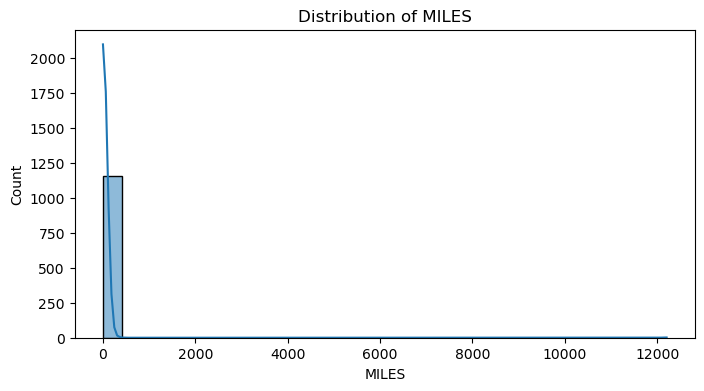

In [4]:
# Plot distribution for each numerical column
numerical_columns = clone_data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(clone_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


In [9]:
# Convert the 'START_DATE' column to datetime
if 'START_DATE' in clone_data.columns:
    clone_data['START_DATE'] = pd.to_datetime(clone_data['START_DATE'], errors='coerce')

# Group by month and sum only numeric columns
monthly_data = clone_data.groupby(clone_data['START_DATE'].dt.to_period('M')).sum(numeric_only=True)

# Display the result
print(monthly_data)

            MILES
START_DATE       
2016-01     183.6
2016-02     309.0
2016-03     259.3
2016-04     821.8
2016-05     239.0
2016-06     275.5
2016-07     341.8
2016-08     261.4
2016-09     172.2
2016-10     361.5
2016-11     400.6
2016-12     198.2


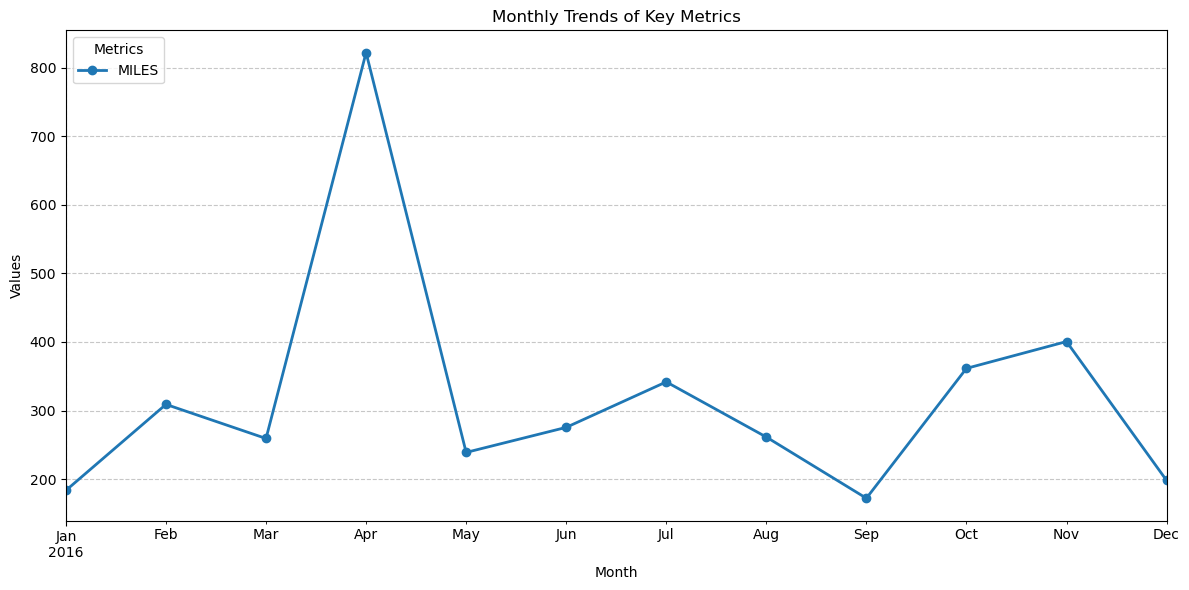

In [10]:
# Plot monthly trends
monthly_data.plot(figsize=(12, 6), marker='o', linewidth=2)
plt.title('Monthly Trends of Key Metrics')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title='Metrics', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Categorical Analysis (To examine the distribution in catergory and purpose.)
category_counts = clone_data['CATEGORY'].value_counts()
print(category_counts)
purpose_counts = clone_data['PURPOSE'].value_counts()
print(purpose_counts)


CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64
PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


C:\Users\prach\AppData\Local\Temp\ipykernel_14784\445277760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_d")


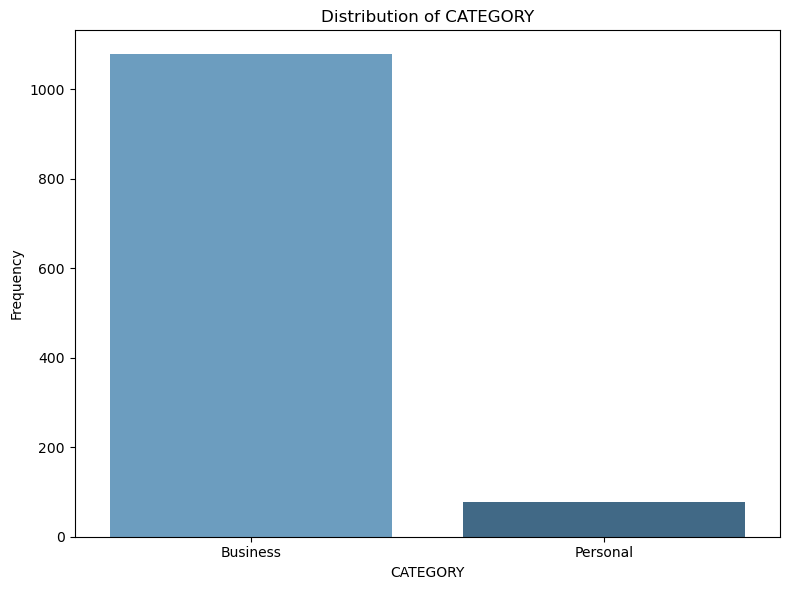

In [13]:
# CATEGORY Distribution (to differentiaite btn the two categories present in catergory column.)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_d")
plt.title('Distribution of CATEGORY')
plt.ylabel('Frequency')
plt.xlabel('CATEGORY')
plt.tight_layout()
plt.show()

C:\Users\prach\AppData\Local\Temp\ipykernel_14784\2629263063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="Greens_d")


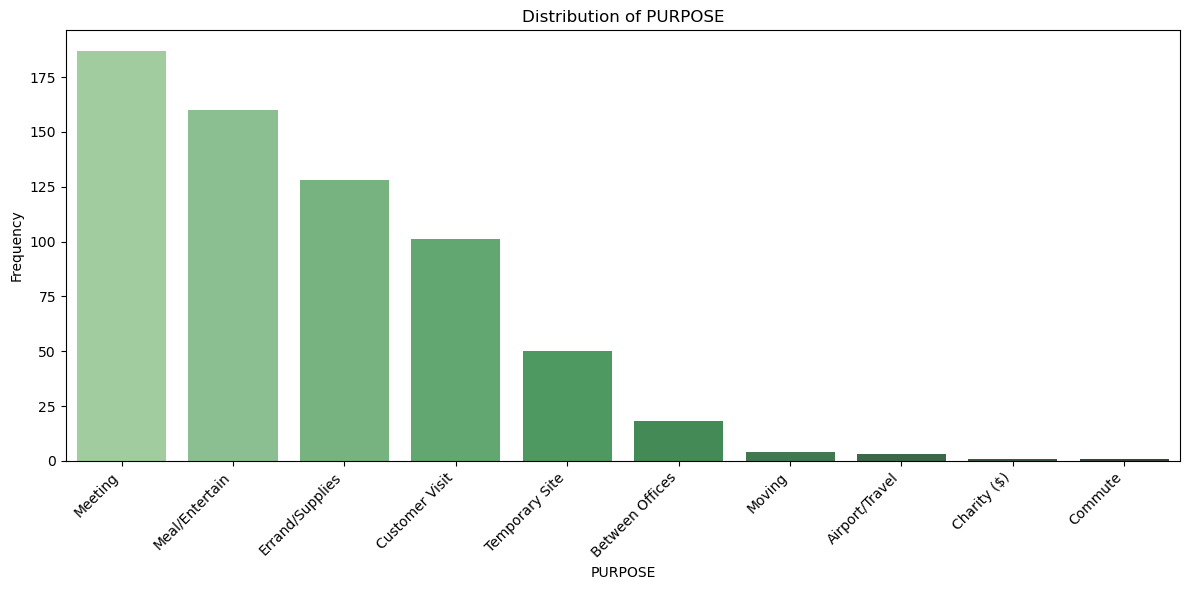

In [14]:
# PURPOSE Distribution (To analyse the various purpose of the ride)
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="Greens_d")
plt.title('Distribution of PURPOSE')
plt.ylabel('Frequency')
plt.xlabel('PURPOSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Geographical Trends (To analyse the travel patterns of the users.)
start_location_counts = clone_data['START'].value_counts()
print(start_location_counts)
stop_location_counts = clone_data['STOP'].value_counts()
print(stop_location_counts)


START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64
STOP
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64


C:\Users\prach\AppData\Local\Temp\ipykernel_14784\4108339028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=start_location_counts.head(10).index, x=start_location_counts.head(10).values, palette="Purples_d")


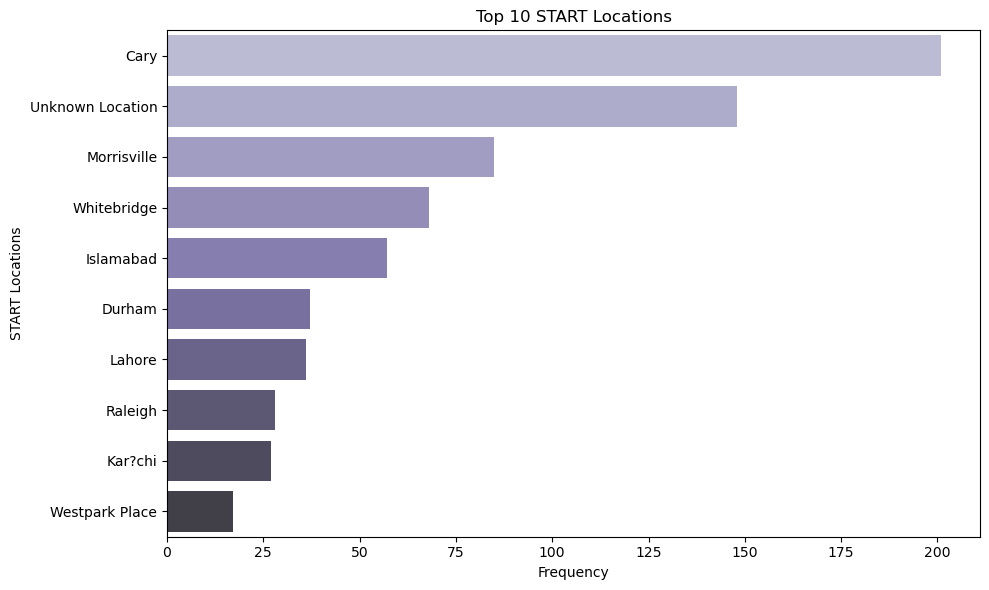

In [16]:
# Top START Locations (Analyse the top 10 locations with the highest number of starts)
plt.figure(figsize=(10, 6))
sns.barplot(y=start_location_counts.head(10).index, x=start_location_counts.head(10).values, palette="Purples_d")
plt.title('Top 10 START Locations')
plt.xlabel('Frequency')
plt.ylabel('START Locations')
plt.tight_layout()
plt.show()

C:\Users\prach\AppData\Local\Temp\ipykernel_14784\3108092257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=stop_location_counts.head(10).index, x=stop_location_counts.head(10).values, palette="Oranges_d")


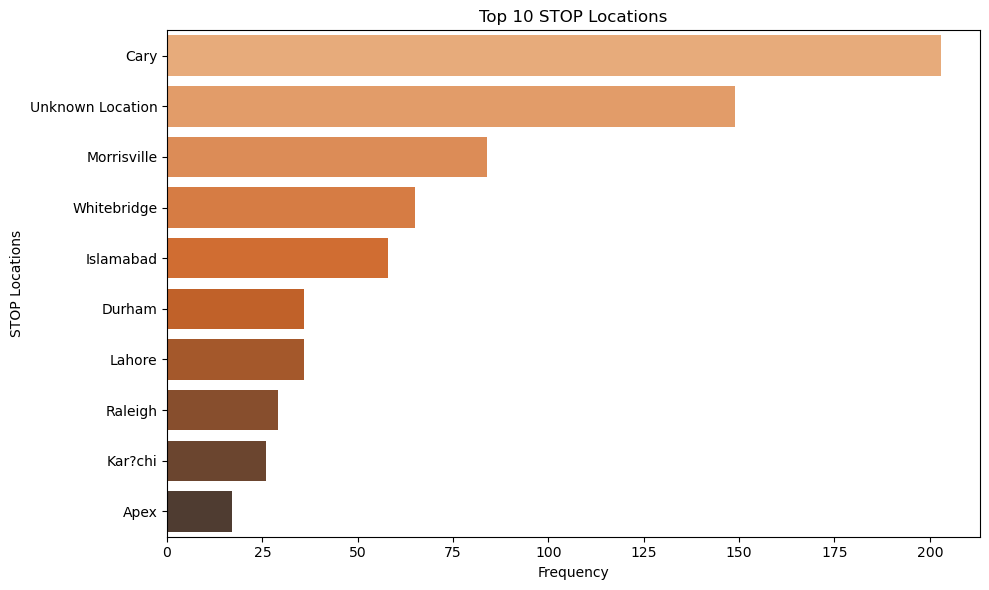

In [17]:
# Top STOP Locations (Analyse the top 10 locations with the most stops)
plt.figure(figsize=(10, 6))
sns.barplot(y=stop_location_counts.head(10).index, x=stop_location_counts.head(10).values, palette="Oranges_d")
plt.title('Top 10 STOP Locations')
plt.xlabel('Frequency')
plt.ylabel('STOP Locations')
plt.tight_layout()
plt.show()